# TMA01, question 1 (40 marks)

**Name**: Kathryn Andrew

**PI**: C8867951

In this question, you will investigate a dataset of common land in England. Common land is registered land to which the public generally have access, as well as potentially other rights (for example, some commons allow the public to graze certain types of animal on that land).

You are interested in the two questions:
1. What proportion of land in each English county is common land?
2. How much common land is in each English county per person in the county?

<img src="Beverley_Westwood_Common_Land_-_geograph.org.uk_-_514559.jpg" alt="Beverley Westwood Common Land, Beverley, East Riding of Yorkshire, England. Beverley Minster can be seen in the distance." style="width: 400px;"/>

<p style="text-align: center;">Beverley Westwood Common Land / Andy Beecroft / <a href=https://creativecommons.org/licenses/by-sa/2.0/>CC BY-SA 2.0</a>


The tasks in this notebook can be addressed using the techniques discussed in parts 2-6 of the module materials, and the associated notebooks.

The question has three parts, looking at different parts of the data analysis pipeline.

Record all your activity and observations in this notebook. Insert additional notebook cells as required. Remember to run each cell in sequence and to rerun cells if you make any changes in earlier cells. 

Before you submit your notebook make sure you run all cells in order and check that you get the results you expect. (It is not unknown to receive notebooks which don't work when the cells are run in order. The most reliable way of checking your results is usually to use the menu option *Kernel $\rightarrow$ Restart & Run All*.)

Note that in this question you are required to use python and the `pandas` library - this is to give you experience with using `pandas` and `DataFrame`s to manipulate data. If you wish, you may use the `pandasql` library as part of "the `pandas` library", as described in the notebooks for Part 3.

In [5]:
# This cell imports some standard libraries you may need 
# for this question.

import pandas as pd

import matplotlib.pyplot as plt

In [26]:
import numpy as np

#### Contents

[Data provenance and importing the data](#provenance)

[Cleaning, reshaping and combining the data sets](#combining)

[Visualising the data](#visualising)

## <a id='provenance'></a>Data provenance, importing and shaping the data

In this notebook, you will use two datasets. You can find these in the `data` directory. Although we have provided both for you here, even when someone passes you a dataset, you need to be able to confirm your usage rights for that data.

#### 1. Licensing for the common land dataset

The common land dataset is stored as a csv file called `common_register_file1v3_2015.csv`. This dataset was obtained from the [UK government data portal](http://data.gov.uk) on 10th June, 2020 from:

https://data.gov.uk/dataset/database-of-registered-common-land-in-england

The files contains Government information licensed under the [Open Government Licence v3.0](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/).

Find the terms of this license, and state:
1. the specific clauses of the licence which allow the OU to distribute the data to you, and
2. the obligations that the licence places upon the OU when distributing the data.
  

1. The license allows anyone to "copy, publish, distribute and transmit the Information", meaning that the OU may distribute the data to students.

2. The OU is obliged to ackowledge the source of the data by "including or linking to any attribution statement specified by the Information Provider(s) and, where possible, provide a link to \[the\] licence".

#### 2. Licensing for the county land and population dataset

The information about the size and populations of counties is stored as a csv file called `counties.csv`. This dataset was obtained from the Wikipedia page:

https://en.wikipedia.org/wiki/Ceremonial_counties_of_England

on 10th June, 2020.

The `counties.csv` file is governed by the [Creative Commons Attribution-ShareAlike 3.0](https://creativecommons.org/licenses/by-sa/3.0/) licence.


From the terms of this licence, and explain why this licence was chosen for the `counties.csv` file. Again, you should identify the specific clauses which explain why the Creative Commons Attribution-ShareAlike 3.0 licence is the appropriate one.

*(2 marks)*


The data in the countries.csv file is intended for widespread and relatively unrestricted public or private use and distribution, and therefore the clauses 3.a, 3.b, and 3.d allow for free distribution of the data itself, allow it to be incorporated into other works that may then be freely distributed, and allow it to be used as the basis of other works. The data is also intended to be periodically updated, quite probably by multiple individuals, and therefore clause 3.b is required to both allow these changes to take place without violating the usage licence. 

#### 3. Importing the datasets

Each row of the commons dataset represents a distinct piece of common land. The name of the county which controls the land is in the `County` column, and the area of each common is in the `Registered AREA in hectares` column.

Import the file `common_register_file1v3_2015.csv`, and create a dataframe named `commons_df` which contains only the columns in `common_register_file1v3_2015.csv` entitled `County` and `Registered AREA in hectares`.

Display a preview of the first five rows of the dataframe. *(2 marks)*

In [7]:
commons_df = pd.read_csv('data/common_register_file1v3_2015.csv');
commons_df.head(5)

,COMMONCD,County,District/BoroughRegistration number,Number of commons in Registers,Registration authority,Registered AREA in hectares,"OS 1:50,000 sheet number",10km grid square,Easting,Northing,...,SITE,Contiguous register unit,STOCK,Other rights,Contiguous common land,MIN Contour,MAX Contour,Median Elevation,DATE,Unnamed: 21
0,1001,Cumbria,Barrow in Furness,1,Barrow-in-Furness,0.08,96,SD26,320800,463600,...,Located on the Isle of Walney south of Barrow-...,CL 2 and Cl 6 (ex Barrow-in-Furness).,NaN,NaN,NaN,0.0,10.0,5.0,NaN,NaN
1,1002,Cumbria,Barrow in Furness,2,Barrow-in-Furness,27.41,96,SD16,319600,466500,...,Located on the east side of the Isle of Walney.,"CLs 1, 3, 4 and 6.",NaN,NaN,NaN,0.0,10.0,5.0,NaN,NaN
2,1003,Cumbria,Barrow in Furness,3,Barrow-in-Furness,27.41,96,SD16,319300,464700,...,Areas of marsh and shingle located on the Isle...,NaN,Cattle.,NaN,NaN,0.0,10.0,5.0,NaN,NaN
3,1004,Cumbria,Barrow in Furness,4,Barrow-in-Furness,27.41,96,SD26,320900,463000,...,Part shown as marsh. Located on the Isle of Wa...,"CLs 2, 3 and 6. (ex Barrow-in-Furness).",Sheep or cattle.,NaN,NaN,0.0,10.0,5.0,NaN,NaN
4,1006,Cumbria,Barrow in Furness,6,Barrow-in-Furness,41.80,96,SD16,318600,465500,...,Located on both the west and east sides of the...,"CLs 1, 2, 3 and 4 (ex Barrow-in-Furness).",Cattle.,Seaweed (1) and Whins (1).,NaN,0.0,12.0,6.0,NaN,NaN


Next, import the file `counties.csv`, and create a dataframe named `counties_df` which contains only the columns in `counties.csv` titled `County for the purposes of the lieutenancies`, `Population (2018)` and `Area (km2)`.

Display a preview of the first five rows of the dataframe. *(4 marks)*

In [8]:
counties_df = pd.read_csv('data/counties.csv', usecols=['County for the purposes of the lieutenancies','Population (2018)','Area (km2)']);
counties_df.head(5)

,County for the purposes of the lieutenancies,Population (2018),Area (km2)
0,Bedfordshire,"669,338","1,235"
1,Berkshire,"911,403","1,262"
2,Bristol,"463,405",110
3,Buckinghamshire,"808,666","1,874"
4,Cambridgeshire,"852,523","3,390"


## <a id='combining'></a>Cleaning, reshaping and combining the data sets

You want to compare the information on common land with the information on county area and population.

The column `County` in the commons dataset gives the list of counties covered by the dataset, and the `County for the purposes of the lieutenancies` gives the list of counties covered by the county information dataset. 

You notice that there are several discrepancies between the values in the two columns which could lead to errors in such an analysis.

#### <a id='identifying_discrepancies'></a>4. Identifying discrepancies between the datasets

When combining datasets, it is important to be systematic about investigating the differences in the columns that you want to use which contain equivalent values. 

Write a statement to generate a set of the county names in your dataframe `commons_df` which do not appear in the county names in your dataframe `counties_df`. *(1 mark)*

In [9]:
set(commons_df['County']) - set(counties_df['County for the purposes of the lieutenancies'])

{'Avon', 'Cleveland', 'Hereford/Worcester', 'Humberside', 'West Sussex.'}

Similarly, write a statement to generate a set of the county names in your dataframe `counties_df` which do not appear in the county names in your dataframe `commons_df`. *(1 mark)*

In [10]:
set(counties_df['County for the purposes of the lieutenancies']) - set(commons_df['County'])

{'Bristol',
 'City of London',
 'East Riding of Yorkshire',
 'Herefordshire',
 'Rutland',
 'West Sussex',
 'Worcestershire'}

#### 5. Correcting the discrepancies between the datasets: county names

In order to combine the dataframes `counties_df` and `commons_df` into a single dataframe, you need to accommodate the variations in the county names in these two dataframes. When investigating English geography, you decide to make the following changes:


1. "Avon" and "Bristol" seem to refer to the same area, so convert the occurrences of `Avon` to refer to `Bristol`.

2. The City of London is part of Greater London, so your `counties_df` dataframe should combine the data for `City of London` into that of `Greater London`,

3. Worcestershire and Herefordshire are often considered together, so your `counties_df` dataframe should combine the data for `Worcestershire` and `Herefordshire` into a single (appropriately named) entry,

4. Humberside was abolished as a county in 1996. The East Riding of Yorkshire is the nearest equivalent, so your `commons_df` dataframe should convert the occurrences of `Humberside` to refer to `East Riding of Yorkshire`.

5. The data for Cleveland should be folded into North Yorkshire, so your `commons_df` dataframe should convert the occurrences of `Cleveland` to refer to `North Yorkshire`, and

6. Rutland should be considered part of Leicestershire, so your `counties_df` dataframe should combine the data for `Rutland` into that of `Leicestershire`.

Use this information, and the results of [part 4](#identifying_discrepancies), to ensure that the information about the county names in the two dataframes is consistent. *(14 marks)*

In [11]:
#Simple name replacements:
commons_df['County'].replace('Avon', 'Bristol', inplace=True)
commons_df['County'].replace('Humberside', 'East Riding of Yorkshire', inplace=True)
commons_df['County'].replace('Cleveland', 'North Yorkshire', inplace=True)
commons_df['County'].replace('West Sussex.', 'West Sussex', inplace=True)

In [12]:
#We need populations and areas as numbers to be able to add them properly
#Strip whitespace and remove commas from the numbers, then convert to floats
counties_df['Population (2018)'] = counties_df['Population (2018)'].str.strip().str.replace(',','').astype(float)
counties_df['Area (km2)'] = counties_df['Area (km2)'].str.strip().str.replace(',','').astype(float)

In [13]:
#Replace county names on rows to be folded in to another
counties_df['County for the purposes of the lieutenancies'].replace('City of London', 'Greater London', inplace=True)
counties_df['County for the purposes of the lieutenancies'].replace('Rutland', 'Leicestershire', inplace=True)

#Worcestershire and Herefordshire both need to be renamed to Hereford/Worcester, as per commons_df
counties_df['County for the purposes of the lieutenancies'].replace('Worcestershire', 'Hereford/Worcester', inplace=True)
counties_df['County for the purposes of the lieutenancies'].replace('Herefordshire', 'Hereford/Worcester', inplace=True)

In [14]:
#finally, group by counties and sum values
counties_df = counties_df.groupby(['County for the purposes of the lieutenancies'], as_index=False).sum()

In [15]:
#check that the sets match
set(counties_df['County for the purposes of the lieutenancies']) == set(commons_df['County'])

True

#### 6. Correcting the discrepancies between the datasets: Units of area

Looking at the two datasets, you realise that the area in the common land dataset is given in hectares, whereas the area in the counties information set is given in square kilometres. You decide to convert all the data into hectares.

Add a column to the `counties_df` dataframe called `Area (Ha)` which contains the area of each county in hectares.

Display a preview of the first five rows of the dataframe. *(1 mark)*

Note: 1 square kilometre is equal to 100 hectares.

In [16]:
counties_df['Area (Ha)'] = 100 * counties_df['Area (km2)']
counties_df.head(5)

,County for the purposes of the lieutenancies,Population (2018),Area (km2),Area (Ha)
0,Bedfordshire,669338.0,1235.0,123500.0
1,Berkshire,911403.0,1262.0,126200.0
2,Bristol,463405.0,110.0,11000.0
3,Buckinghamshire,808666.0,1874.0,187400.0
4,Cambridgeshire,852523.0,3390.0,339000.0


#### 7. Reshaping the commons dataset

Using the `commons_df` dataframe, create a pandas dataframe `common_area_df` which contains:
- a column containing the county names taken from the `commons_df['County']` column, and
- a column containing the total area of common land in that county, taken from the `commons_df['Registered AREA in hectares']` column.


For example, if the `commons_df` dataframe contained the data:

| County | Registered AREA in hectares |
|----|----|
|Derbyshire | 0.95 |
|Derbyshire |	8.40 |
|Derbyshire	| 27.30 |
|Wiltshire	| 0.80 |
|Wiltshire	| 69.32 |

then your `common_area_df` might look something like this:

| County | Registered AREA in hectares |
|----|----|
|Derbyshire | 36.65 |
|Wiltshire	| 70.12 |

If you wish, you might prefer to hold the county names in the index of your dataframe, rather than in a column; either is fine.

When you have constructed your dataframe, display the first 5 rows. *(3 marks)*

In [17]:
common_area_df = commons_df[['County', 'Registered AREA in hectares']].groupby(['County'], as_index=False).sum()
common_area_df.head(5)

,County,Registered AREA in hectares
0,Bedfordshire,402.43
1,Berkshire,1771.02
2,Bristol,1140.47
3,Buckinghamshire,1173.98
4,Cambridgeshire,797.07


## <a id='visualising'></a>Visualising the data

You have been asked to answer the two questions:

1. What proportion of land in each English county is common land?
2. How much common land is in each English county per person living in the county?

Your task is to plot two bar charts, where each bar represents one county, and the size of each bar represents:
1. The proportion of common land of all land in the county, and
2. The amount of common land per person living in the county.


#### 8. Create a dataframe containing plotting data

To create your plots, you should create a new dataframe that combines the data from your dataframes `counties_df` and `common_area_df`. Your dataframe should have a row for each county, containing the name of the county, the ratio of common land to all land in the county, and the amount of common land per person in the county.

When you have constructed your dataframe, display the first 5 rows. *(4 marks)*

In [18]:
#Column with county names needs renaming to merge
counties_df.rename(columns={'County for the purposes of the lieutenancies': 'County'}, inplace=True)
plotting_df = pd.merge(counties_df, common_area_df)

#Rename 'Registered AREA in hectares' column to something more indicative for the merged table
plotting_df.rename(columns={'Registered AREA in hectares': 'Common Area (Ha)'}, inplace=True)

#Add required columns
plotting_df['Common Area To County Area'] = plotting_df['Common Area (Ha)'] / plotting_df['Area (Ha)']
plotting_df['Ha per person'] = plotting_df['Common Area (Ha)'] / plotting_df['Population (2018)']

#Remove columns not required(?) 
#plotting_df = plotting_df[['County', 'Common Area To County Area', 'Ha per person']]

plotting_df.head(5)

,County,Population (2018),Area (km2),Area (Ha),Common Area (Ha),Common Area To County Area,Ha per person
0,Bedfordshire,669338.0,1235.0,123500.0,402.43,0.003259,0.000601
1,Berkshire,911403.0,1262.0,126200.0,1771.02,0.014033,0.001943
2,Bristol,463405.0,110.0,11000.0,1140.47,0.103679,0.002461
3,Buckinghamshire,808666.0,1874.0,187400.0,1173.98,0.006265,0.001452
4,Cambridgeshire,852523.0,3390.0,339000.0,797.07,0.002351,0.000935


#### 9. Plot the data

Having created an appropriate dataframe, you should now plot the data as a bar chart.

As stated, your task is to plot two bar charts, where each bar represents one county, and the size of each bar represents:

1. The ratio of common land to all land in the county, and
2. The amount of common land per person living in the county.

for the two graphs respectively.

The plots should also be sorted, so that the bars are in order of increasing height.

Your graphs should have appropriate titles, axis labels, and legends.

Remember that for this question, your solution must be carried out using the `pandas` library: you must provide python commands which generate the required plot from your plotting dataframe.

Finally, comment on your charts: What do they tell you (or don't tell you) about the amount of common land in England?

*(6 marks)*



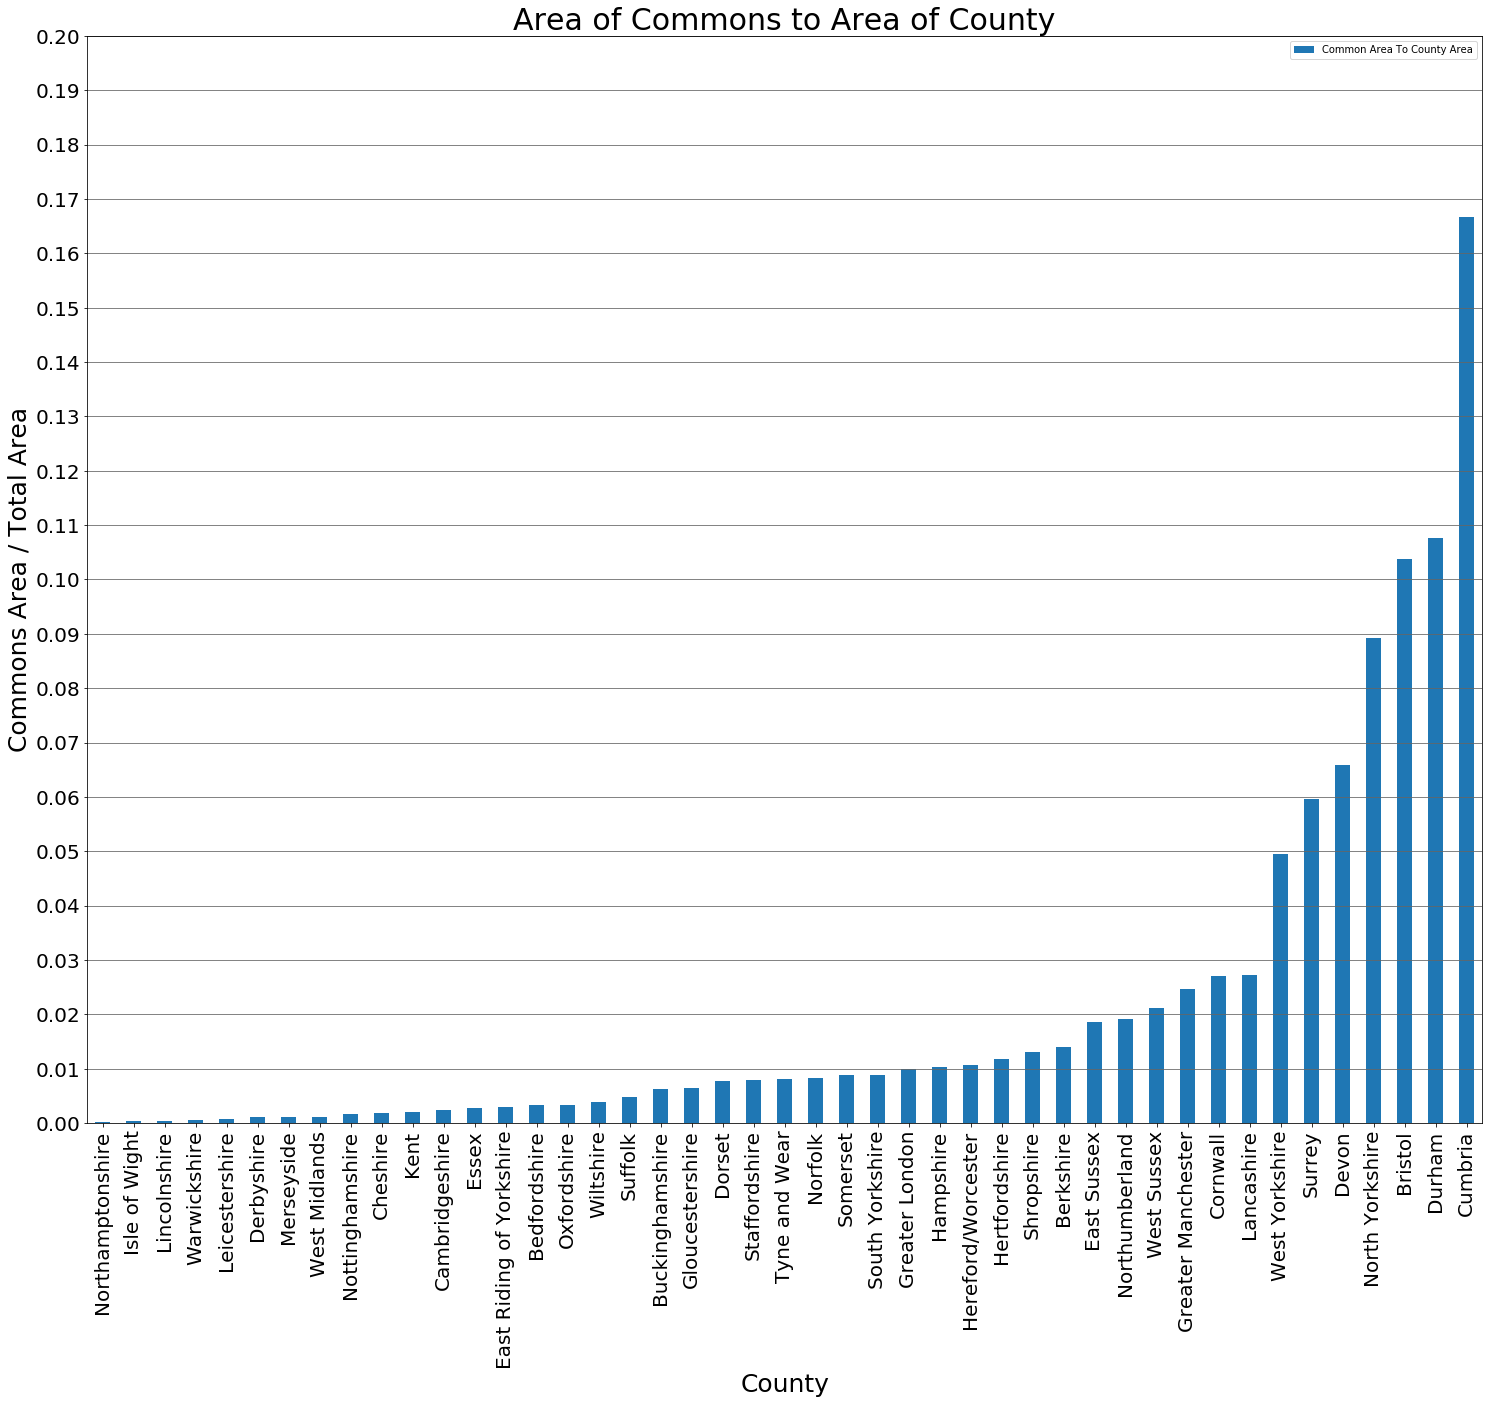

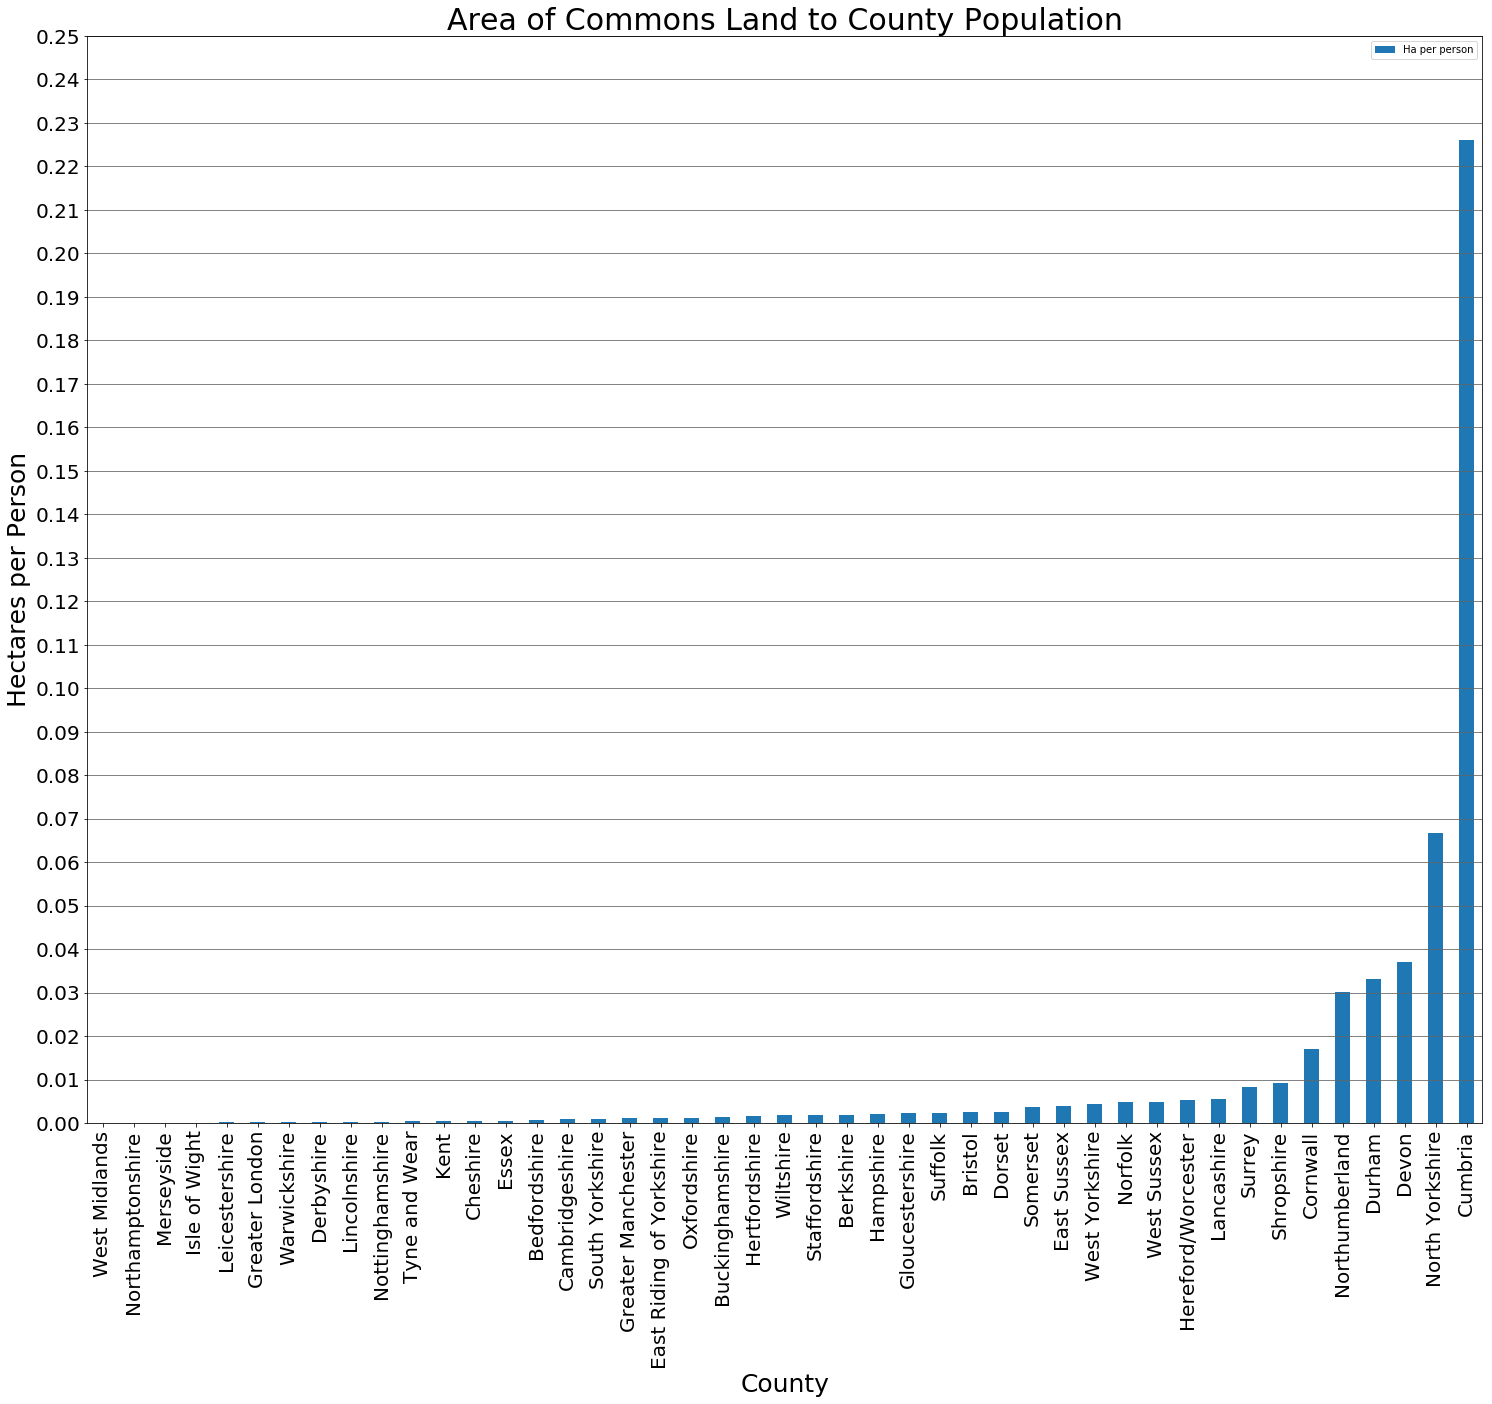

In [46]:
#plot bar chart of commons area to county area
plotting_df[['Common Area To County Area']].sort_values(by=['Common Area To County Area']).plot.bar(figsize=(25,20));

#Title and axes labels
plt.title('Area of Commons to Area of County', fontsize=30)
plt.xlabel('County', fontsize=25)
plt.ylabel('Commons Area / Total Area', fontsize=25)

#Label x axis ticks as county names.  Remember to sort into the right order!
plt.xticks(range(plotting_df['County'].size),plotting_df.sort_values(by=['Common Area To County Area'])['County']);
plt.xticks(fontsize=20);

#size and space yticks
plt.yticks(fontsize=20);
plt.yticks(np.arange(0, 0.21, 0.01));

#plot horizontal gridlines for easier reading
plt.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')


#plot bar chart of commons area to population
plotting_df[['Ha per person']].sort_values(by=['Ha per person']).plot.bar(figsize=(25,20));

#Title and axes labels
plt.title('Area of Commons Land to County Population', fontsize=30)
plt.xlabel('County', fontsize=25)
plt.ylabel('Hectares per Person', fontsize=25)

#Label x axis ticks as county names.  Remember to sort into the right order!
plt.xticks(range(plotting_df['County'].size),plotting_df.sort_values(by=['Ha per person'])['County']);
plt.xticks(fontsize=20);

#size and space yticks
plt.yticks(fontsize=20);
plt.yticks(np.arange(0, 0.26, 0.01));

#plot horizontal gridlines for easier reading
plt.grid(b=True, which='major', axis='y', color='#666666', linestyle='-')

Both charts show a long tail of counties with low area of common land relative to both population and overall county area (no more than 3% of land being common land, or no more than 0.01 hectares per person), followed by a small group of counties with a significantly larger proportion of common land. 7 counties have a significantly greater percentage of common land to all land with a range from just under 5% to about 16.5%, and 6 have a significantly larger area of common land per person with a range from about 0.03 hectares per person to about 0.225 hectares per person.  

The chart of commons area to total area values shows a greater range in values in the tail than the chart of commons area to population.

West Yorkshire, Surrey, Devon, North Yorkshire, Bristol, Durham and Cumbria all have significantly more common land as a percentage of county area. Of these, Durham, Devon, North Yorkshire and Cumbria also have significantly more common land per person as well. Northumberland is significant in the graph for common land per person, but only towards the higher end of the tail for common land as a percentage of area, suggesting a relatively low population. Conversely West Yorkshire, Surrey, and Bristol all have a significant amount of common land as a percentage of area, but relatively low common land per person suggesting densely populated counties.  

Cumbria is an anomaly on both charts, showing an extremely large amount of common land by both measures, far beyond any other county. 

The inclusion of Cumbria particularly, and the handful of counties with far higher values on their respective charts, makes the chart difficult to read for the majority of counties in the tail with low values. Plots without these outlier counties could be of use in visualising the data for the majority of counties. 

Overall, the amount of common land is consistently low per person for most counties with only a few outliers with more than 0.01 hectares per person and the majority having less than half that. It consists of a more obvious range of percentages of total county area, but a majority of counties have under 1% of land as common land and only a few have significantly more.

This method of visualisation makes it difficult to tell at a glance how counties differ in common land to total area versus common land to population, and how strongly the two are linked. It also does little to inform on overall totals across the country, beyond a ballpark estimate taking into acount the bar ranges and distributions. 